In [1]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
from tqdm import tqdm

In [2]:
from b2heavy.FnalHISQMetadata import params as mData

In [3]:
from b2heavy.ThreePointFunctions.globalfit import RatioSet

In [4]:
DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'
DATA_2PT = '/Users/pietro/Desktop/lattice24/0.25/corr2_3'

In [6]:
ENSEMBLE = 'Coarse-1'

In [17]:
MOMLIST = ['000','100','200','300']
# RATLIST = ['ZRA1','RA1','XFSTPAR','XV','R0','R1']
RATLIST = ['XFSTPAR','XV','R0','R1','RA1']
SMSLIST = ['1S','RW']

cov_specs = dict(scale=True,shrink=True,cutsvd=1E-12)

In [18]:
rset = RatioSet(ENSEMBLE,MOMLIST,RATLIST,SMSLIST)
rset.collect(DATA_DIR,DATA_2PT)

100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


In [19]:
TMIN     = 1

priors = rset.params()
fit = rset.fit(
    tmin   = TMIN,
    priors = priors,
    **cov_specs
)   

rset.show(fit)


f0                        A_1S  \
mom ratio                                             
100 XFSTPAR  0.0779(47)   [-0.0487(74), -0.011(11)]   
    XV       0.1192(41)  [-0.0257(59), -0.0135(58)]   
    R0       0.1084(76)    [-0.044(11), -0.006(10)]   
    R1        1.016(13)    [-0.032(13), -0.031(12)]   
    RA1       0.729(47)      [0.040(19), 0.037(19)]   
200 XFSTPAR  0.1439(70)     [-0.081(11), 0.006(17)]   
    XV       0.2279(61)   [-0.0434(80), -0.017(10)]   
    R0        0.197(12)     [-0.068(15), 0.012(18)]   
    R1        0.990(18)     [-0.022(17), 0.030(26)]   
    RA1       0.737(62)    [-0.013(24), -0.013(23)]   
300 XFSTPAR   0.203(11)     [-0.118(19), 0.029(36)]   
    XV       0.3123(99)    [-0.053(13), -0.008(20)]   
    R0        0.262(18)     [-0.072(24), 0.027(37)]   
    R1        0.936(31)     [-0.003(29), 0.164(81)]   
    RA1       0.595(86)    [-0.033(35), -0.032(34)]   

                                   A_RW                        B_1S  \
mom ratio                                                             
100 XFSTPAR   [-0.0059(97), -0.027(12)]   [-0.0487(74), -0.011(11)]   
    XV       [-0.0238(74), -0.0086(62)]  [-0.0257(59), -0.0135(58)]   
    R0         [-0.028(15), -0.006(11)]    [-0.044(11), -0.006(10)]   
    R1         [-0.031(19), -0.006(15)]    [-0.032(13), -0.031(12)]   
    RA1          [0.189(36), 0.158(34)]      [0.040(19), 0.037(19)]   
200 XFSTPAR     [0.018(13), -0.018(17)]     [-0.081(11), 0.006(17)]   
    XV       [-0.0460(93), -0.0128(93)]   [-0.0434(80), -0.017(10)]   
    R0          [-0.039(19), 0.008(18)]     [-0.068(15), 0.012(18)]   
    R1          [-0.041(22), 0.053(24)]     [-0.022(17), 0.030(26)]   
    RA1          [0.233(43), 0.197(40)]    [-0.013(24), -0.013(23)]   
300 XFSTPAR     [0.031(17), -0.013(30)]     [-0.118(19), 0.029(36)]   
    XV         [-0.064(13), -0.012(17)]    [-0.053(13), -0.008(20)]   
    R0          [-0.049(23), 0.031(32)]     [-0.072(24), 0.027(37)]   
    R1          [-0.030(31), 0.172(64)]     [-0.003(29), 0.164(81)]   
    RA1          [0.221(62), 0.188(57)]    [-0.033(35), -0.032(34)]   

                                   B_RW  
mom ratio                                
100 XFSTPAR   [-0.0059(97), -0.027(12)]  
    XV       [-0.0238(74), -0.0086(62)]  
    R0         [-0.028(15), -0.006(11)]  
    R1         [-0.031(19), -0.006(15)]  
    RA1          [0.189(36), 0.158(34)]  
200 XFSTPAR     [0.018(13), -0.018(17)]  
    XV       [-0.0460(93), -0.0128(93)]  
    R0          [-0.039(19), 0.008(18)]  
    R1          [-0.041(22), 0.053(24)]  
    RA1          [0.233(43), 0.197(40)]  
300 XFSTPAR     [0.031(17), -0.013(30)]  
    XV         [-0.064(13), -0.012(17)]  
    R0          [-0.049(23), 0.031(32)]  
    R1          [-0.030(31), 0.172(64)]  
    RA1          [0.221(62), 0.188(57)]

In [20]:
rset.fit_result(TMIN,fit,priors=priors)

# ---------- Global fit in 1 for ens: Coarse-1 --------------
Least Square Fit:
  chi2/dof [dof] = 1.1 [330]    Q = 0.12    logGBF = 1008

Parameters:
            dE_D     0.311 (24)      [  0.50 (50) ]  
            dM_B     0.232 (27)      [  0.50 (50) ]  
            dM_D      0.87 (40)      [  0.50 (50) ]  
  XFSTPAR_100_f0    0.0779 (47)      [  0.08 (50) ]  
XFSTPAR_100_1S 0   -0.0487 (74)      [    0 ± 1.0 ]  
               1    -0.011 (11)      [    0 ± 1.0 ]  
XFSTPAR_100_RW 0   -0.0059 (97)      [    0 ± 1.0 ]  
               1    -0.027 (12)      [    0 ± 1.0 ]  
       XV_100_f0    0.1192 (41)      [  0.11 (50) ]  
     XV_100_1S 0   -0.0257 (59)      [    0 ± 1.0 ]  
               1   -0.0135 (58)      [    0 ± 1.0 ]  
     XV_100_RW 0   -0.0238 (74)      [    0 ± 1.0 ]  
               1   -0.0086 (62)      [    0 ± 1.0 ]  
       R0_100_f0    0.1084 (76)      [  0.11 (50) ]  
     R0_100_1S 0    -0.044 (11)      [    0 ± 1.0 ]  
               1    -0.006 (10)      [ 

{'fit': <lsqfit.nonlinear_fit at 0x170561e10>,
 'chi2red': 358.943617401318,
 'chi2aug': 360.84215247207646,
 'chiexp': 329.99999999997755,
 'pexp': 0.104,
 'pstd': 0.26263980214652505}

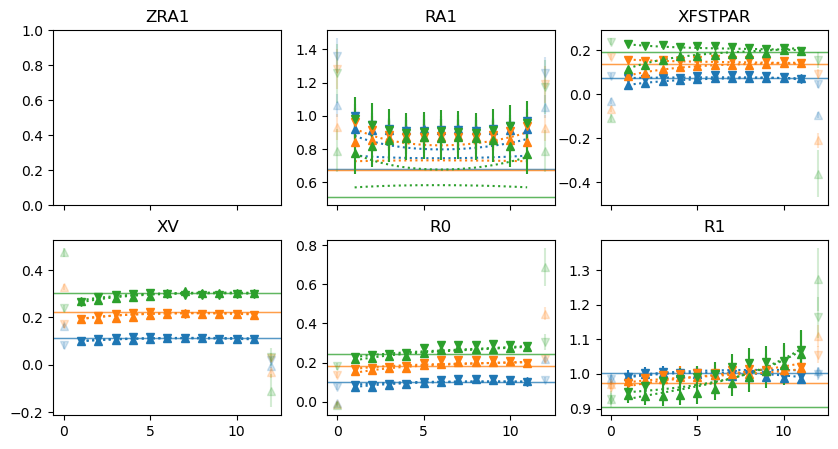

In [21]:
f, ax = plt.subplots(2,3,figsize=(10,5), sharex=True)

rset.plot_fit('ZRA1'   ,fit,ax[0,0])
fit,ax[0,0].set_title('ZRA1'    )

rset.plot_fit('RA1'    ,fit,ax[0,1])
fit,ax[0,1].set_title('RA1'    )

rset.plot_fit('XFSTPAR',fit,ax[0,2])
fit,ax[0,2].set_title('XFSTPAR')

rset.plot_fit('XV'     ,fit,ax[1,0])
fit,ax[1,0].set_title('XV'     )

rset.plot_fit('R0'     ,fit,ax[1,1])
fit,ax[1,1].set_title('R0'     )

rset.plot_fit('R1'     ,fit,ax[1,2])
fit,ax[1,2].set_title('R1'     )


plt.show()

# Form factors